

# Import libraries.


In [ ]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
import os
import cv2
#tesor fow & keras
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import l2     
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization,Dropout,Input
from keras.models import Sequential, Model
from keras.layers import Conv2D,GlobalMaxPooling2D
from tensorflow.keras.applications import  Xception,VGG16,InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

#cnn
from tensorflow.keras import datasets, layers, models

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.engine.base_layer import Layer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
seed = 42
np.random.seed =seed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '.'

In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Breast Cancer Detection.zip")

     |████████████████████████████████| 77 kB 2.6 MB/s 
patool: Extracting /content/drive/MyDrive/Breast Cancer Detection.zip ...
patool: running /usr/bin/7z x -o./Unpack_7qevjprs -- "/content/drive/MyDrive/Breast Cancer Detection.zip"
patool: ... /content/drive/MyDrive/Breast Cancer Detection.zip extracted to `Breast Cancer Detection' (multiple files in root).


'Breast Cancer Detection'

In [ ]:
image_path = "/content/Breast Cancer Detection/IDC_regular_ps50_idx5/"

# Helper Functions .

 i make this  helper functions to make my code easy  and organiezed  as below ⏬
1.    function to load image and labels .
2.    function to identify our labels.

In [ ]:
# here in this function i collect my data depending on label name 
# 0 is non infected
# 1 is infected
labels = ['0','1']

# to load image  linked with labels from dirictory
def load_images_from_directory(main_dirictory):
    total_labels=[]
    images =[]
    pathes =[]
    total_normal=0
    total_infected=0
    folders  = os.listdir(main_dirictory) 
    for i,file in enumerate(folders)  :
        if file == 'IDC_regular_ps50_idx5':
            continue 
        for lab in labels :
            full_path = main_dirictory+os.path.join(file,lab)
            for image in os.listdir(full_path):
                img = cv2.imread(full_path+'/'+image)
                img = cv2.resize(img,(50,50))
                images.append(img)
                pathes.append(full_path+'/'+image)
                if lab  == '0':
                        label = 0
                        total_normal+= 1
                elif lab == '1' :
                        label = 1
                        total_infected +=1
                total_labels.append(label)
    print('total normal image       := ',total_normal)
    print('total Infected image     := ',total_infected)
    return shuffle(images,total_labels,pathes,random_state=756349782)

# get label Name   
def get_Label(number):
    labels = {0:'Uninfected', 1:'Infected'}
    return labels[number]

# Data Preperation.
Load Labels
*   collect all image label and add it in data frame.

Load Images
*   Train images
*   Test images

In [ ]:
images, all_labels, pathes =  load_images_from_directory(image_path)

total normal image       :=  198738
total Infected image     :=  78786


Due to Hardware limitation , i will reduce image count to procced my model.

In [ ]:
images=images[0:150000]
all_labels=all_labels[0:150000]
pathes =pathes[0:150000]
print('Total Images :',len(images))
print('Total Labels :',len(all_labels))
print('Total Pathes',len(pathes))


Total Images : 150000
Total Labels : 150000
Total Pathes 150000


In [ ]:
#creat data frame to save each image with its label 
df =pd.DataFrame({
    'image_path':pathes,
    'label':all_labels,
    
})
df.head(5)

,image_path,label
0,/content/Breast Cancer Detection/IDC_regular_p...,0
1,/content/Breast Cancer Detection/IDC_regular_p...,0
2,/content/Breast Cancer Detection/IDC_regular_p...,0
3,/content/Breast Cancer Detection/IDC_regular_p...,0
4,/content/Breast Cancer Detection/IDC_regular_p...,1


In [ ]:
df.shape

(150000, 2)

In [ ]:
df['label'].value_counts()

0    107575
1     42425
Name: label, dtype: int64

# Virsialization  Images 


1.   visualize images .
2.   visualize labels to check is data  balanced or Not.



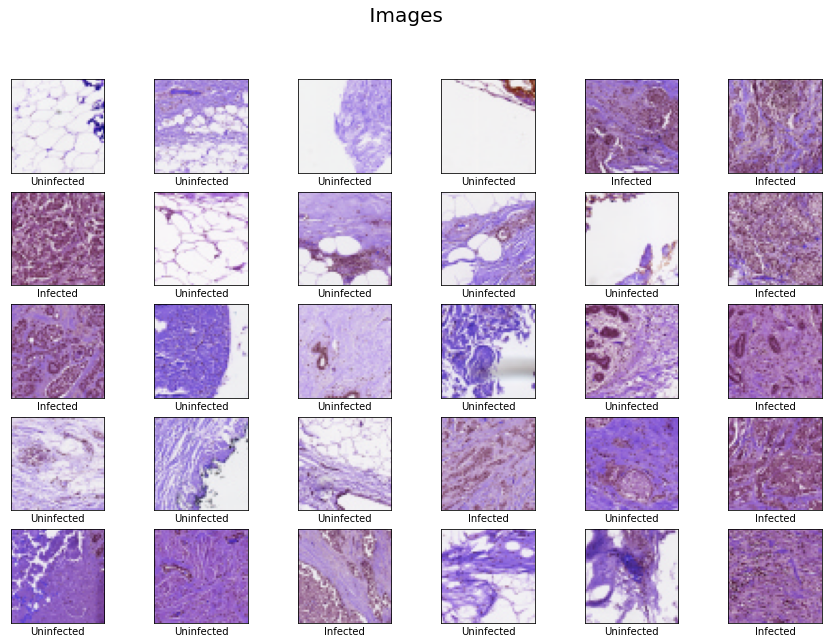

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle(" Images", fontsize=20)
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(get_Label(all_labels[i]))
    plt.imshow(images[i], cmap=plt.cm.binary)

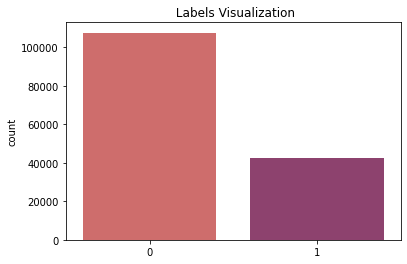

In [ ]:
plt.title(' Labels Visualization')
sns.countplot(x=all_labels,palette='flare')
plt.show()

*   From above Visualization <span style="color:crimson;"> **We Find Data is Totally Not Balnced** </span> & that will cause proplem for predection , so i will try to  Balance data First  to make my model be faire for the 2 Classes  .

In [ ]:
df_infected  = df[df['label']==1]
df_uninfected= df[df['label']==0]

# Data Prepocessing


1.   Data speliting
2.   Data Normalization 
3.   Data Balansing



In [ ]:
x_train,x_test,y_train,y_test  = train_test_split(images,all_labels ,random_state=42,shuffle=True,test_size=0.3)

In [ ]:
x_train = np.asarray(x_train,np.float32)/255
x_test  = np.asarray(x_test,np.float32) /255
y_train = np.asarray(y_train)
y_test  = np.asarray(y_test)

In [ ]:
print('Train Images shape is   : ',x_train.shape)
print('Train  Labels  shape is : ',y_train.shape)

Train Images shape is   :  (105000, 50, 50, 3)
Train  Labels  shape is :  (105000,)


In [ ]:
print('Test Images shape is   : ',x_test.shape)
print('Test  Labels  shape is : ',y_test.shape)

Test Images shape is   :  (45000, 50, 50, 3)
Test  Labels  shape is :  (45000,)


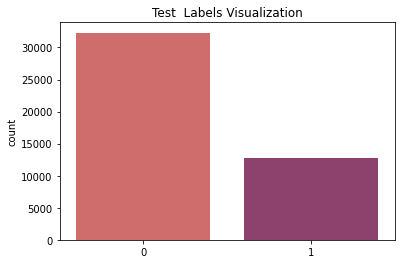

In [ ]:
plt.title('Test  Labels Visualization')
sns.countplot(x=y_test,palette='flare')
plt.show()

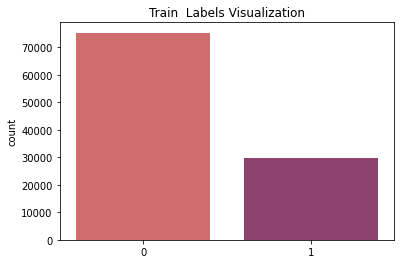

In [ ]:
plt.title('Train  Labels Visualization')
sns.countplot(x=y_train,palette='flare')
plt.show()

#  Data  Balancing


 here I will use  undersampling methods. 



In [ ]:
# convert  Data  to 1D for  compatability downsampling method
shape = 50*50*3
x_train = x_train.reshape(x_train.shape[0],shape )
x_test  = x_test.reshape(x_test.shape[0], shape)

In [ ]:
print('shape of new train data is :',x_train.shape)
print('shape of new Test data is :',x_test.shape)

shape of new train data is : (105000, 7500)
shape of new Test data is : (45000, 7500)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#call module
underampler = RandomUnderSampler(sampling_strategy='auto') 
#fit data to model
x_train_fit, y_train_fit = underampler.fit_resample(x_train, y_train)
X_test_fit,  Y_test_fit   = underampler.fit_resample(x_test, y_test)
# return data to its original shape
x_train_ = x_train_fit.reshape(x_train_fit.shape[0],50,50,3)
x_test_  = X_test_fit.reshape(X_test_fit.shape[0], 50,50,3)


#  Visualization after Sampling Data :

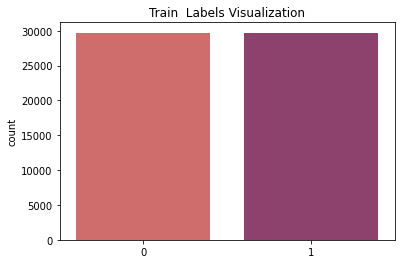

In [ ]:
plt.title('Train  Labels Visualization')
sns.countplot(x=y_train_fit,palette='flare')
plt.show()

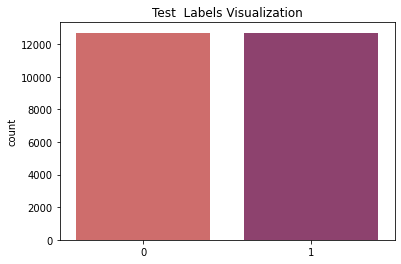

In [ ]:
plt.title('Test  Labels Visualization')
sns.countplot(x=Y_test_fit,palette='flare')
plt.show()

In [ ]:
print("Train data shape =",x_train_.shape)
print(" Test data shape =",x_test_.shape)

Train data shape = (59446, 50, 50, 3)
 Test data shape = (25404, 50, 50, 3)


Now Data Is Totaly Balanced Lets model it .

# Buliding CNN Model

**I will use Data augmentation,as it  is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points.** 



In [ ]:
batch_size = 32
#create image generator for images 
image_gen = ImageDataGenerator(
                                  shear_range = 0.2,
                                  zoom_range = 0.3,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  fill_mode='nearest',
                                   horizontal_flip=True,
                                   rotation_range = 20, 
                            
                               )

# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(  
                                  shear_range = 0.2,
                                  zoom_range = 0.3,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  fill_mode='nearest',
                                   horizontal_flip=True,
                                   rotation_range = 20,)

        
train = image_gen.flow(
      x_train_,
      y_train_fit,
      shuffle=True, 
      batch_size=batch_size
      )
test = test_data_gen.flow(
      x_test_,
      Y_test_fit,
      shuffle=True, 
      batch_size=batch_size
      )


In [ ]:
# get shape of train data 
for train_img , train_label in train :
    print('image shape ',train_img.shape)
    print('label  shape ',train_label.shape)
    break 
    

image shape  (32, 50, 50, 3)
label  shape  (32,)


In [ ]:
# get shape of train data 
for t_img , t_label in test :
    print('image shape ',t_img.shape)
    print('label  shape ',t_label.shape)
    break 

image shape  (32, 50, 50, 3)
label  shape  (32,)


In [ ]:
#start bulding CNN Model
cnn_model = Sequential()
cnn_model.add(layers.Conv2D(64,(3,3),padding ='Same',activation = 'relu',input_shape=(50,50,3)))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.Conv2D(128,(3,3) ,padding ='same',activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.Conv2D(128,(3,3),padding ='same',activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2)) 
cnn_model.add(BatchNormalization())
cnn_model.add(layers.Conv2D(256,(3,3) ,padding ='same',activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2)) 
cnn_model.add(layers.Conv2D(256,(3,3) ,padding ='same',activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2)) 
cnn_model.add(BatchNormalization())
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                        

In [ ]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(1024, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))
cnn_model.add(layers.Dense(1024, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))
cnn_model.add(layers.Dense(1, activation ='sigmoid'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                        

In [ ]:
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],)

  **1-Defining Callbacks**

*   A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc)


**2-Reduce Learning Rate on Plateau**
*   Is used to reduce the learning rate when a metric has stopped improving.

In [ ]:
early = EarlyStopping(monitor="loss", mode="min",min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience = 2, verbose=1,factor=0.3, min_lr=0.0001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
# Training model
n_training_samples = len(train)
n_validation_samples = len(test)
history = cnn_model.fit(
    train,
    epochs=15,
    validation_data=test,
    validation_steps=n_validation_samples//batch_size,
    # steps_per_epoch =n_training_samples//batch_size,
    shuffle = True,
    callbacks=callbacks_list
    )

Epoch 1/15
1858/1858 [==============================] - 1058s 567ms/step - loss: 0.4607 - accuracy: 0.8014 - val_loss: 0.7745 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 2/15
1858/1858 [==============================] - 1039s 559ms/step - loss: 0.3992 - accuracy: 0.8284 - val_loss: 0.4289 - val_accuracy: 0.7995 - lr: 0.0010
Epoch 3/15
1858/1858 [==============================] - 1019s 548ms/step - loss: 0.3900 - accuracy: 0.8343 - val_loss: 0.7074 - val_accuracy: 0.7826 - lr: 0.0010
Epoch 4/15
1858/1858 [==============================] - 999s 537ms/step - loss: 0.3777 - accuracy: 0.8380 - val_loss: 0.4762 - val_accuracy: 0.7643 - lr: 0.0010
Epoch 5/15
1858/1858 [==============================] - 995s 536ms/step - loss: 0.3736 - accuracy: 0.8422 - val_loss: 0.4503 - val_accuracy: 0.7930 - lr: 0.0010
Epoch 6/15
1858/1858 [==============================] - 999s 538ms/step - loss: 0.3674 - accuracy: 0.8455 - val_loss: 0.3747 - val_accuracy: 0.8294 - lr: 0.0010
Epoch 7/15
1858/1858 [=========

In [ ]:
score, acc = cnn_model.evaluate(test,batch_size=batch_size)                       
print('Test score:', score)
print('Test accuracy:', acc)

794/794 [==============================] - 114s 144ms/step - loss: 1.9413 - accuracy: 0.8068
Test score: 1.9412658214569092
Test accuracy: 0.8068020939826965


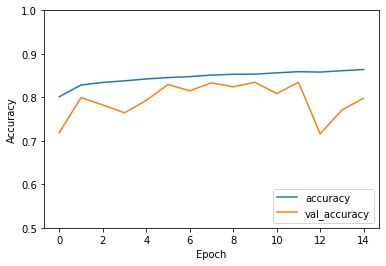

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
cnn_prediction = cnn_model.predict(test)

In [ ]:
cnn_prediction[1:10]

array([[0.0483968 ],
       [0.50486493],
       [0.10236979],
       [0.9415443 ],
       [0.28322196],
       [0.8006765 ],
       [0.23071733],
       [0.90915763],
       [0.9870445 ]], dtype=float32)

In [ ]:
cnn_prediction = cnn_model.predict_generator(t_img)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print('f1 score ',f1_score(cnn_prediction.round(),t_label,average='micro'))
print('recall ',recall_score(cnn_prediction.round(),t_label,average=None))
print('precision ',precision_score(cnn_prediction.round(),t_label,average=None))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


f1 score  0.71875
recall  [0.73333333 0.70588235]
precision  [0.6875 0.75  ]
